In [32]:
#!g1.1
import tensorflow as tf

In [2]:
#!g1.1
tf.__version__

'1.15.0'

In [3]:
#!g1.1

import pandas as pd
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split

In [6]:
#!g1.1

def get_train_test_data(filename: str):
    data = pd.read_csv(filename, header=None).values
    assert data.shape[1] == 785
    train, test = train_test_split(data, random_state=42)
    x_train = train[:, 1:]
    y_train = train[:, 0]
    x_test = test[:, 1:]
    y_test = test[:, 0]
    return x_train, y_train, x_test, y_test

In [7]:
#!g1.1

x_train, y_train, x_test, y_test = get_train_test_data("emnist-letters-train.csv")

In [8]:
x_train.shape

(66600, 784)

In [13]:
x_train = x_train.reshape(-1, 28, 28)

In [9]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                        

from keras.models import Sequential  # Model Нейронной сети

from keras.layers.core import Dense, Dropout, Activation # Функции Активации и Слои нейронной сети
from keras.utils import np_utils    

Using TensorFlow backend.


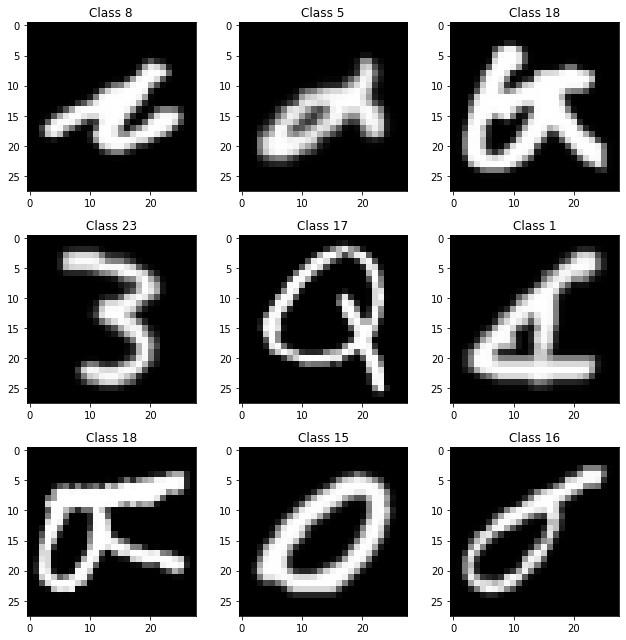

In [14]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

#  Учитывая, что работаем с изображениями, сразу перейдем к светочным сетям

In [18]:
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [19]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [20]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [26]:
# one-hot encoding
nb_classes = 26

# диапазон y: 1-26. Отнимем 1 для перевода в 0-25, чтобы было 26 категорийных классов 
y_train = np_utils.to_categorical(y_train - 1, nb_classes)
y_test = np_utils.to_categorical(y_test - 1, nb_classes)

In [37]:
#!g1.1

model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 РАЗНЫХ! 3x3 kernels -- это 32 карты с признаками
model.add(BatchNormalization(axis=-1))                
convLayer01 = Activation('relu')                    
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        
convLayer02 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 РАЗНЫХ! 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))              
convLayer03 = Activation('relu')                     
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # MaxPool операция 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Разворачиваем матрицу 4x4x64 в 1024-мерный плоский вектор

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 нейронов
model.add(BatchNormalization())               
model.add(Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout 
model.add(Dense(nb_classes))                         # выходной слой 26 нейронов
model.add(Activation('softmax'))                     # softmax  (перевзвешивает все предсказания для получения значения в диапазоне 0..1)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:848: UserWarning: The following variables cannot be serialized: convLayer01, convLayer02, convLayer03, convLayer04
  warnings.warn(message)


In [38]:
#!g1.1

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)       

In [39]:
#!g1.1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
#!g1.1

model.fit(x_train, y_train,
          batch_size=32, epochs=10,
          verbose=1)


Epoch 1/10
66600/66600 [==============================] - 21s 314us/step - loss: 0.3905 - accuracy: 0.8749
Epoch 2/10
66600/66600 [==============================] - 15s 221us/step - loss: 0.2218 - accuracy: 0.9240
Epoch 3/10
66600/66600 [==============================] - 14s 215us/step - loss: 0.1882 - accuracy: 0.9339
Epoch 4/10
66600/66600 [==============================] - 15s 218us/step - loss: 0.1655 - accuracy: 0.9406
Epoch 5/10
66600/66600 [==============================] - 14s 213us/step - loss: 0.1478 - accuracy: 0.9442
Epoch 6/10
66600/66600 [==============================] - 14s 215us/step - loss: 0.1348 - accuracy: 0.9494
Epoch 7/10
66600/66600 [==============================] - 14s 215us/step - loss: 0.1220 - accuracy: 0.9533
Epoch 8/10
66600/66600 [==============================] - 15s 219us/step - loss: 0.1115 - accuracy: 0.9565
Epoch 9/10
66600/66600 [==============================] - 14s 210us/step - loss: 0.1039 - accuracy: 0.9580
Epoch 10/10
66600/66600 [===========

In [41]:
#!g1.1

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

22200/22200 [==============================] - 2s 71us/step
Test score: 0.1812130472023745
Test accuracy: 0.944009006023407


Видно, что получена точность на тестовой выборке 94,4%. Можно пробовать увеличивать количество эпох, другую конфигурацию сверточной сети, но лучше всего использовать transfer learning

In [ ]:
# Посмотрим на предсказания сети

In [50]:
#!g1.1
def class_to_letter(cls: int) -> str:
    a_index = 97
    return chr(a_index + cls)

assert(class_to_letter(1) == "b")

Predicted class p


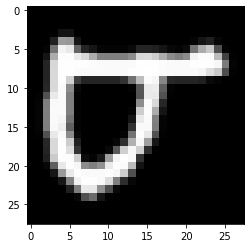

In [56]:
#!g1.1
random_index = np.random.randint(x_test.shape[0])
plt.imshow(x_test[random_index].reshape(28,28), cmap='gray', interpolation='none')
cls = np.argmax(model.predict(x_test[random_index].reshape(1,28,28,1)))
print("Predicted class {}".format(class_to_letter(cls)))

# Как-то сразу не обратил внимания, что буквы повернуты